# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Инструкция по выполнению проекта
Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv. Скачать датасет
Шаг 2. Подготовьте данные
Замените названия столбцов (приведите к нижнему регистру);
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
Шаг 3. Проведите исследовательский анализ данных
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?
Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.
Шаг 6. Напишите общий вывод
Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

# Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [3]:
data =  pd.read_csv('/datasets/games.csv',sep=',')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Вывод : Колонка "Year_of_Release" - типа float64, навзвание колонок разного регистра, рейтинг К-А = Е. Так же имеются пропуски которые будет удалять или заполнять.


# Подготовьте данные

## Замените названия столбцов (приведите к нижнему регистру)

In [6]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
data.columns = map(str.lower, data.columns) #приводим к нижнему регистру.

In [8]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [9]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [10]:
data['rating'] = data['rating'].replace('K-A', 'E') #https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

In [11]:
data['year_of_release'] = data['year_of_release'].fillna(-1).astype(int)

In [12]:
data['user_score'] = data['user_score'].fillna(-1) #по такому же принципу поступим и с оценками.

Значения в столбцах 'year_of_release' и 'user_score' на -1, для того чтобы в будущем не сбивали нам подсчёты. Заменить на средние значение или медиану было бы не верно.

In [13]:
data['user_score'] = data['user_score'].replace('tbd', -1)
data['user_score'] = pd.to_numeric(data['user_score']) 

Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой
пользователей. Отдельно разберите это значение и опишите, как его
обработать. tbd- будет определен позднее, новые данные нам конечно не предоставят и не доплнят существующие, заменим "-1"

In [14]:
data.query('name.isnull()') 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,-1.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,-1.0,NaN


In [15]:
data.dropna(subset = ['name'], inplace = True) #всего 2 пропуска, удалить.

In [16]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['rating'] = data['rating'].fillna('not_rating')

In [17]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.info() #Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


In [18]:
data.duplicated().sum()

0

Вывод : Пропуски заполнены, дубликатов нет. Все значения заполнены не характерным значением "-1", чтобы в дальнейшем нам не мешали подсчётам.

In [19]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB
None
-------------------------
name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
name : ко

# Проведите исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


Text(0.5, 0, 'Год выпуска')

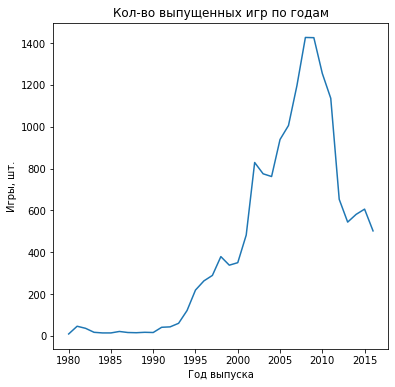

In [20]:
count_by_year = data.query('year_of_release >= 1980').groupby('year_of_release')['name'].count()
count_by_year.plot(figsize=(6, 6), title='Кол-во выпущенных игр по годам')
ax = plt.gca()
ax.set_ylabel('Игры, шт.')
ax.set_xlabel('Год выпуска')

Видим, что до 2009 был огромный рост выпуска игр. Думаю связанно это с большим кол-вом различных приставок. Актульно будет брать срез по играм от 2011 года, показатели будут более приближенны к нынешним цифрам.

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [21]:
data.query('year_of_release > 2011').pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='-')

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,93.0,91.0,80.0,86.0,46.0
DS,23.0,8.0,-,-,-
PC,61.0,38.0,47.0,50.0,54.0
PS3,148.0,126.0,108.0,73.0,38.0
PS4,-,16.0,75.0,137.0,164.0
PSP,106.0,54.0,10.0,3.0,-
PSV,53.0,63.0,100.0,110.0,85.0
Wii,31.0,12.0,6.0,4.0,1.0
WiiU,32.0,42.0,31.0,28.0,14.0


Видно, что в среднем платформы начинают новыю эру в 2005-2007 года(хотя уже с 2013 идёт новое поколение, но там мало данных), для дальнейшего использования возьмем срез за последние 5 лет, с 2011 года.

In [22]:
 new_data = data.query('year_of_release >= 2011')

In [23]:
platform_sales = new_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
platform_sales.head(10)

,platform,total_sales
0,PS3,445.57
1,X360,380.38
2,PS4,314.14
3,3DS,257.81
4,XOne,159.32
5,PC,97.68
6,Wii,95.02
7,WiiU,82.19
8,PSV,53.81
9,DS,38.73


In [24]:
top_platforms = platform_sales['platform'].to_list() #создадим список платформ
top_platforms

['PS3',
 'X360',
 'PS4',
 '3DS',
 'XOne',
 'PC',
 'Wii',
 'WiiU',
 'PSV',
 'DS',
 'PSP',
 'PS2']

In [25]:
game_stat_new_top = new_data.query('platform in @top_platforms')
game_stat_new_top.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,not_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,not_rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [26]:
#Посмотрим на новую таблицу
game_stat_new_top.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum', fill_value='-')

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
3DS,63.2,51.36,56.57,43.76,27.78,15.14
DS,26.18,11.01,1.54,-,-,-
PC,35.03,23.22,12.38,13.28,8.52,5.25
PS2,0.45,-,-,-,-,-
PS3,156.78,107.36,113.25,47.76,16.82,3.6
PS4,-,-,25.99,100.0,118.9,69.25
PSP,17.82,7.69,3.14,0.24,0.12,-
PSV,4.63,16.19,10.59,11.9,6.25,4.25
Wii,59.65,21.71,8.59,3.75,1.14,0.18


Видим, что пиковые значения приходились на 2011-2012 года. Далее дела идут более плачевно, но видно сразу гигимонов рынка. 

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Выручка, млн дол.')

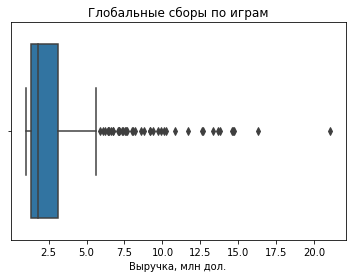

In [27]:
#берем только те игры, общие продажи которых больше 1 млн долларов
s = new_data.query('total_sales > 1')
ax = sns.boxplot('total_sales', data= s)
ax.set_title('Глобальные сборы по играм')
ax.set_xlabel('Выручка, млн дол.')

Оу, разница в продажах есть и существенная. Кто-то продал на 80 млн.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Выручка, млн дол.')

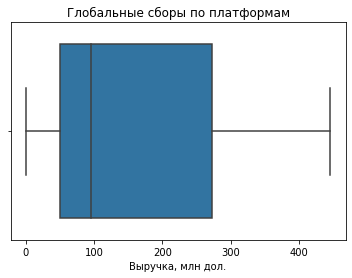

In [28]:
p = new_data.groupby('platform')['total_sales'].sum().reset_index()
ax = sns.boxplot('total_sales', data=p)
ax.set_title('Глобальные сборы по платформам')
ax.set_xlabel('Выручка, млн дол.')

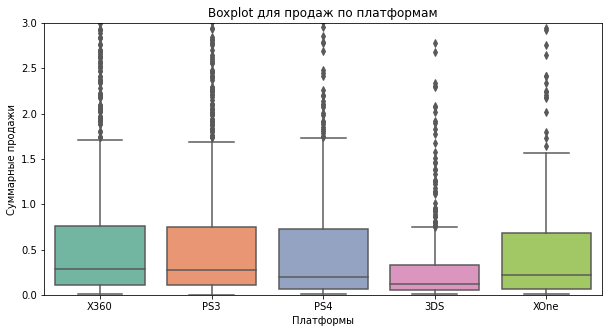

In [29]:
platform_best3=['PS4','XOne','3DS', 'X360','PS3']
plt.figure(figsize=(10,5))
box_best6 = sns.boxplot(x="platform", y="total_sales", data=data.query('platform.isin(@platform_best3)'), palette="Set2")
box_best6.set(ylim=(0,3))
plt.ylabel('Суммарные продажи')
plt.xlabel('Платформы')
plt.title('Boxplot для продаж по платформам')
plt.show()

Основные продажи в районе 40 - 400 млн., видим интересный хвост, но не влияющий  на медиану.

Text(0, 0.5, '')

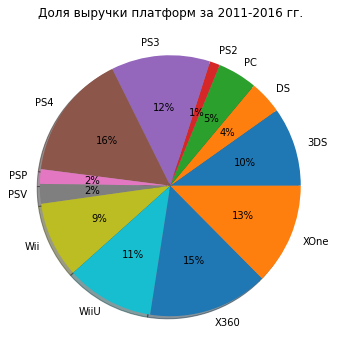

In [30]:
#посмотрим на среднюю выручку платформ по годам
revenue_mean = new_data.groupby('platform')['total_sales'].mean()
revenue_mean.plot(kind='pie', figsize=(6, 6), autopct='%1.0f%%', shadow=True, title='Доля выручки платформ за 2011-2016 гг.')
ax = plt.gca()
ax.set_ylabel('')

Вот наши лидеры - PS3,PS4,Wii,Wiu,X360,XOne,3DS.

In [31]:
#выделим в отдельную таблицу продажи по X360
game_stat_x360 = new_data.query('platform == "X360" and user_score != -1 and critic_score != -1')

Text(0.5, 0, 'Оценка пользователей')

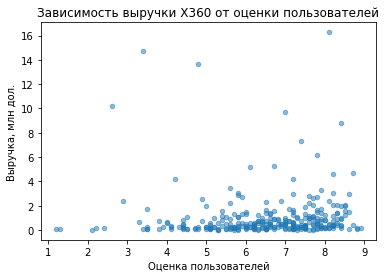

In [32]:
game_stat_x360.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки X360 от оценки пользователей')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка пользователей')

In [33]:
game_stat_x360['total_sales'].corr(game_stat_x360['user_score'])

0.024110542685083735

Text(0.5, 0, 'Оценка критиков')

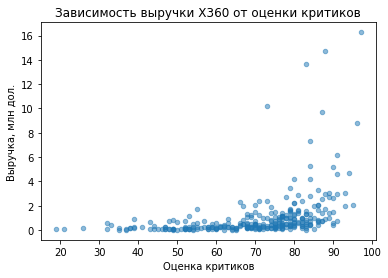

In [34]:
game_stat_x360.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки X360 от оценки критиков')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка критиков')

In [35]:
game_stat_x360['total_sales'].corr(game_stat_x360['critic_score'])

0.39039696950102515

Зависимости от оценом нет, но вот от оценки критиков не большая зависимость есть.

In [36]:
#выделим в отдельную таблицу продажи по XOne
game_stat_xone = new_data.query('platform == "XOne" and user_score != -1 and critic_score != -1')

Text(0.5, 17.200000000000003, 'Оценка пользователей')

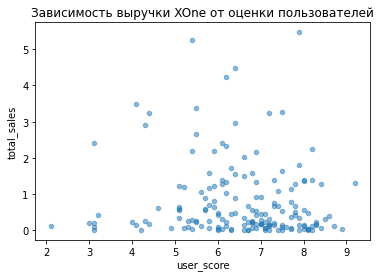

In [37]:
game_stat_xone.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки XOne от оценки пользователей')
ax_1 = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка пользователей')

In [38]:
game_stat_xone['total_sales'].corr(game_stat_xone['user_score'])

-0.09400318326920852

Text(0.5, 0, 'Оценка критиков')

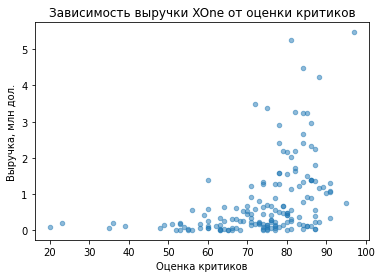

In [39]:
game_stat_xone.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки XOne от оценки критиков')
ax_1 = plt.gca()
ax_1.set_ylabel('Выручка, млн дол.')
ax_1.set_xlabel('Оценка критиков')

In [40]:
game_stat_xone['total_sales'].corr(game_stat_xone['critic_score'])

0.4104220356129637

In [41]:
#выделим в отдельную таблицу продажи по PS3
game_stat_ps3 = new_data.query('platform == "PS3" and user_score != -1 and critic_score != -1')

Text(0.5, 0, 'Оценка пользователей')

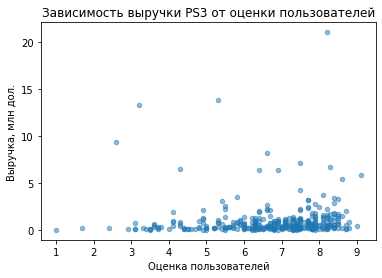

In [42]:
game_stat_ps3.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки PS3 от оценки пользователей')
ax_2 = plt.gca()
ax_2.set_ylabel('Выручка, млн дол.')
ax_2.set_xlabel('Оценка пользователей')

In [43]:
game_stat_ps3['total_sales'].corr(game_stat_ps3['user_score'])

0.025188713843039043

Text(0.5, 0, 'Оценка критиков')

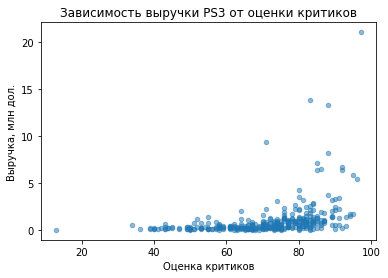

In [44]:
game_stat_ps3.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки PS3 от оценки критиков')
ax_2 = plt.gca()
ax_2.set_ylabel('Выручка, млн дол.')
ax_2.set_xlabel('Оценка критиков')

In [45]:
game_stat_ps3['total_sales'].corr(game_stat_ps3['critic_score'])

0.3762850329134494

In [46]:
#выделим в отдельную таблицу продажи по PS4
game_stat_ps4 = new_data.query('platform == "PS4" and user_score != -1 and critic_score != -1')

Text(0.5, 0, 'Оценка пользователей')

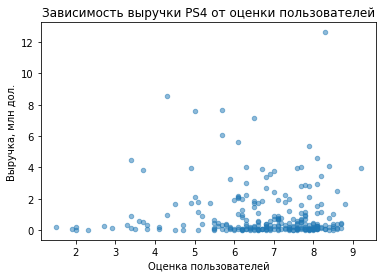

In [47]:
game_stat_ps4.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки PS4 от оценки пользователей')
ax_3 = plt.gca()
ax_3.set_ylabel('Выручка, млн дол.')
ax_3.set_xlabel('Оценка пользователей')

In [48]:
game_stat_ps4['total_sales'].corr(game_stat_ps4['user_score'])

-0.03362497596528878

Text(0.5, 0, 'Оценка критиков')

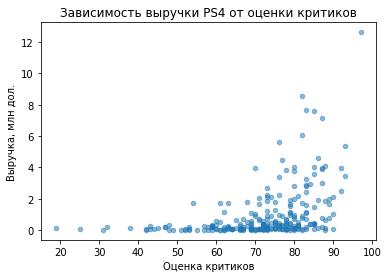

In [49]:
game_stat_ps4.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки PS4 от оценки критиков')
ax_3 = plt.gca()
ax_3.set_ylabel('Выручка, млн дол.')
ax_3.set_xlabel('Оценка критиков')

In [50]:
game_stat_ps4['total_sales'].corr(game_stat_ps4['critic_score'])

0.40589480145836687

In [51]:
#выделим в отдельную таблицу продажи по WiiU
game_stat_wiiu = new_data.query('platform == "WiiU" and user_score != -1 and critic_score != -1')

Text(0.5, 0, 'Оценка пользователей')

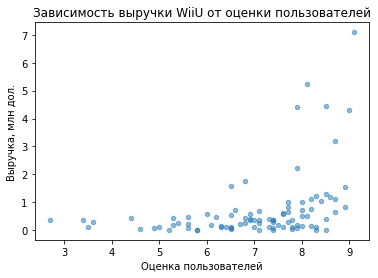

In [52]:
game_stat_wiiu.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки WiiU от оценки пользователей')
ax_4 = plt.gca()
ax_4.set_ylabel('Выручка, млн дол.')
ax_4.set_xlabel('Оценка пользователей')

In [53]:
game_stat_wiiu['total_sales'].corr(game_stat_wiiu['user_score'])

0.3918479505297129

Text(0.5, 0, 'Оценка критиков')

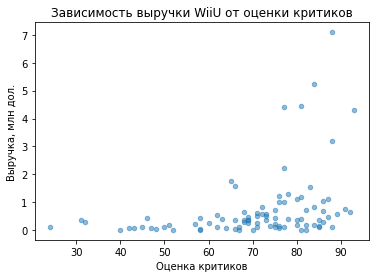

In [54]:
game_stat_wiiu.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки WiiU от оценки критиков')
ax_4 = plt.gca()
ax_4.set_ylabel('Выручка, млн дол.')
ax_4.set_xlabel('Оценка критиков')

In [55]:
game_stat_wiiu['total_sales'].corr(game_stat_wiiu['critic_score'])

0.35088242248864304

Text(0.5, 0, 'Оценка пользователей')

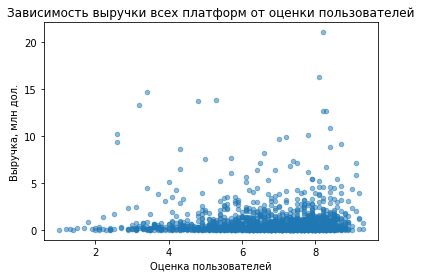

In [56]:
game_stat_new_filtered = new_data.query('user_score != -1 and critic_score != -1')
game_stat_new_filtered.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки всех платформ от оценки пользователей')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка пользователей')

In [57]:
game_stat_new_filtered['total_sales'].corr(game_stat_new_filtered['user_score'])

0.02950143936031489

Text(0.5, 0, 'Оценка критиков')

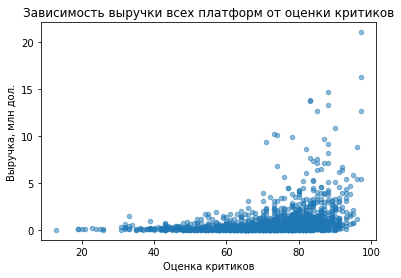

In [58]:
game_stat_new_filtered.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки всех платформ от оценки критиков')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка критиков')

In [59]:
game_stat_new_filtered['total_sales'].corr(game_stat_new_filtered['critic_score'])

0.32660362178848995

Вывод такой же, от оценки пользователей зависимости практически нет, а вот от критиков минимальная, но есть. И это наюблюдается во всех платформах.

In [60]:
new_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,557.80
Shooter,402.91
Role-Playing,245.63
Sports,237.15
Misc,139.42
Platform,88.68
Racing,88.31
Fighting,66.90
Simulation,50.26


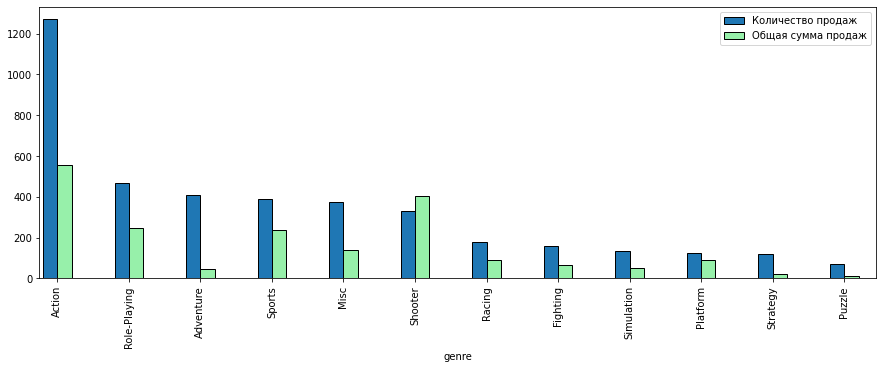

In [61]:
ax = plt.gca()

pivot = new_data.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1)

plot2 = pivot['total_sales']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='#97F0AA', position=0)

ax.legend(['Количество продаж', 'Общая сумма продаж'])

Вывод:
Провели исследовательский анализ данных, на котором сделали срез с 2011по 2016 год, увидели явных лидеров в продажах как в платформах, так и в жанрах. Оценили зависимость выручки от оценки пользователей и оценки критиков - критики влияют больше на продажи, чем пользователи.

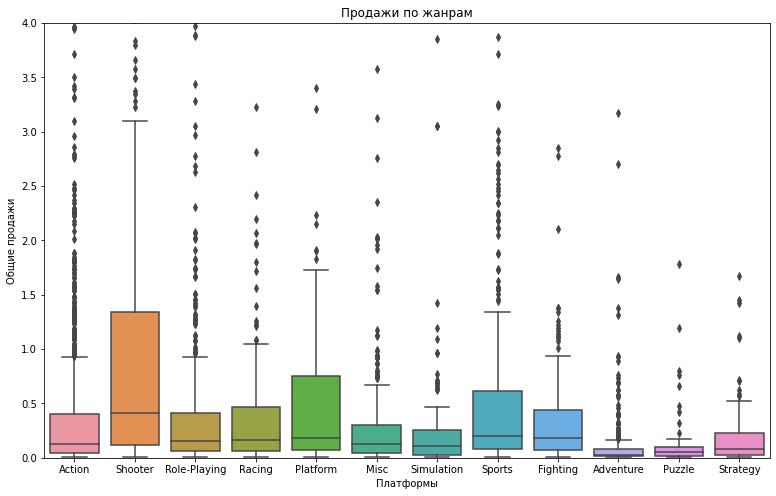

In [86]:
# Комментарий ревьюера 4
plt.figure(figsize=(13, 8))
(sns.boxplot(data = new_data, y = 'total_sales', x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 4)))

plt.show()

# Составим портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Северная америка.

In [62]:
(new_data.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5))

,platform,na_sales
10,X360,226.80
4,PS3,168.26
5,PS4,108.74
11,XOne,93.12
0,3DS,82.65


In [63]:
(new_data.query('rating != -1').groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5))

,rating,na_sales
3,M,308.45
0,E,170.17
6,not_rating,123.69
1,E10+,117.72
5,T,109.31


In [64]:
(new_data.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5))

,genre,na_sales
0,Action,230.92
8,Shooter,194.43
10,Sports,108.70
7,Role-Playing,83.78
3,Misc,69.69


Европа.

In [65]:
(new_data.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5))

,platform,eu_sales
4,PS3,163.10
5,PS4,141.09
10,X360,117.10
0,3DS,61.27
2,PC,56.70


In [66]:
(new_data.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5))

,genre,eu_sales
0,Action,199.12
8,Shooter,148.02
10,Sports,88.48
7,Role-Playing,62.30
6,Racing,40.58


In [67]:
(new_data.query('rating != -1').groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5))

,rating,eu_sales
3,M,250.26
0,E,141.73
6,not_rating,116.61
5,T,83.16
1,E10+,78.00


Япония.

In [68]:
(new_data.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5))

,platform,jp_sales
0,3DS,100.62
4,PS3,49.39
6,PSP,24.04
7,PSV,21.84
5,PS4,15.96


In [69]:
(new_data.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5))

,genre,jp_sales
7,Role-Playing,79.87
0,Action,63.62
3,Misc,17.60
2,Fighting,12.38
4,Platform,12.13


In [70]:
(new_data.query('rating != -1').groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5))

,rating,jp_sales
6,not_rating,138.21
0,E,36.68
5,T,33.39
3,M,26.14
1,E10+,11.23


Другие.

In [71]:
(new_data.groupby('platform')['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending=False).head(5))

,platform,other_sales
4,PS3,64.82
5,PS4,48.35
10,X360,33.13
11,XOne,14.27
0,3DS,13.27


In [72]:
(new_data.groupby('genre')['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending=False).head(5))

,genre,other_sales
0,Action,64.14
8,Shooter,48.54
10,Sports,28.88
7,Role-Playing,19.68
3,Misc,12.41


In [73]:
(new_data.query('rating != -1').groupby('rating')['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending=False).head(5))

,rating,other_sales
3,M,81.96
0,E,40.86
6,not_rating,33.97
5,T,28.17
1,E10+,23.91


In [74]:
# создадим список регионов
regions = ['na_sales','eu_sales','jp_sales']
df_since2011=data.query('year_of_release >= 2011')

In [75]:
# посмотрим для себя где и как продается всё
print("Суммарные продажи, млн.проданных копий в регионе")
for reg in regions:
    sum_region=df_since2011[reg].sum()     
    print(reg, round(sum_region))

Суммарные продажи, млн.проданных копий в регионе
na_sales 830
eu_sales 670
jp_sales 246


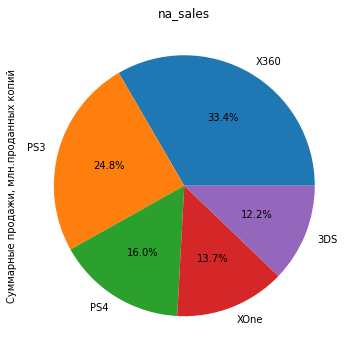

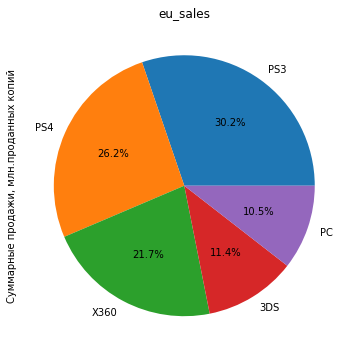

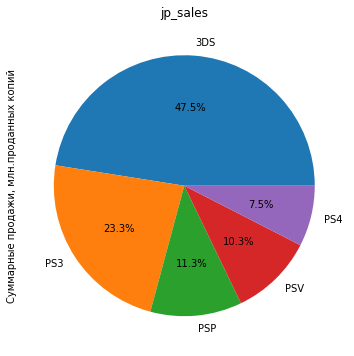

In [76]:
# создадим цикл для быстрого вывода для каждого региона
for reg in regions:
    (df_since2011.pivot_table(index='platform', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=False).head(5)
                .plot(kind='pie', y=reg, figsize=(6, 6), legend=False, title = reg, autopct='%1.1f%%')
                .set(ylabel='Суммарные продажи, млн.проданных копий')
    )
    plt.show()

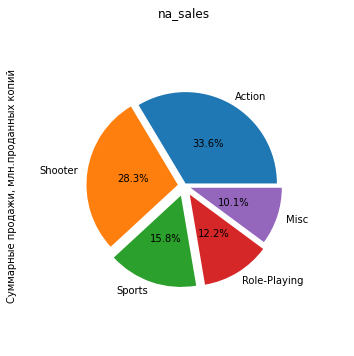

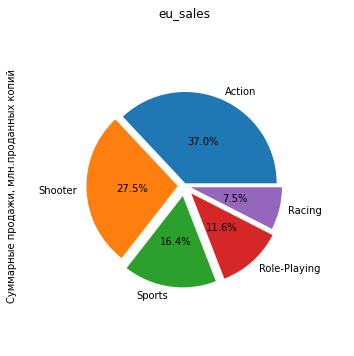

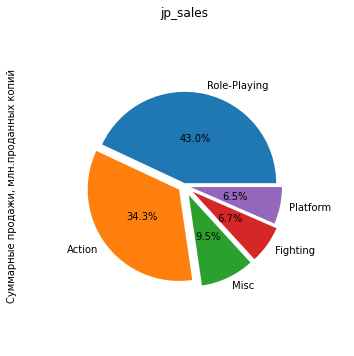

In [77]:
for reg in regions:
    (new_data.pivot_table(index='genre', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=False).head(5)
                .plot(kind='pie', y=reg, figsize=(6, 6), legend=False, pctdistance=0.5, 
                      labeldistance=1.1, radius=0.7, title = reg, autopct='%1.1f%%', explode = [0.02, 0.05, 0.08, 0.08, 0.05])
                .set(ylabel='Суммарные продажи, млн.проданных копий')
    )
    plt.show()

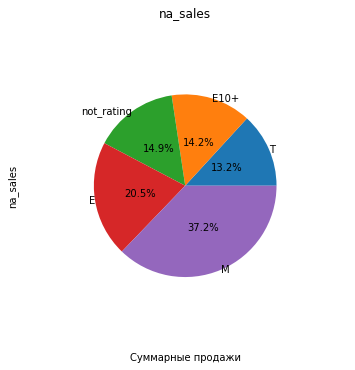

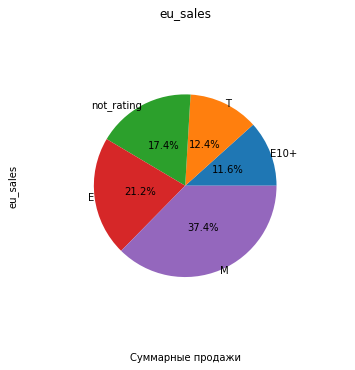

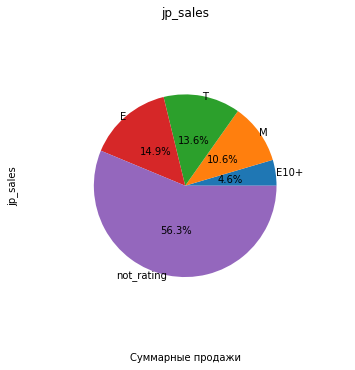

In [78]:
rating_actual= new_data.query('year_of_release >= 2011')
for reg in regions:
    (rating_actual.pivot_table(index='rating', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=True).tail(5)
                .plot(kind='pie', y=reg, figsize=(6, 6), legend=False, pctdistance=0.5, 
                      labeldistance=1, radius=0.7, title = reg, autopct='%1.1f%%')
                .set(xlabel='Суммарные продажи')
    )
    plt.show()

Вывод:
В Северной Америке и Европе схожие взгляды как на приставки, так и на игры. Даже рейтинги игры очень схож. На их фоне выделяется Япония в которой на втором месте идут игры с рейтигом Т(для подростков). Так же изменения по популярным жанрам, либо они играют в спокойные игры, либо верно указвают данные при регистрации :)
В целом взять весь мир, взгляды на приставки, жанры, рейтинги практически одиннаковый, выделяется Япония, но только флагманами продаж в остальном картина сразу похожа на весь мир. Так же видим, что игры с рейтингом ESRB предназначены для США И Канады, напрашивается вывод, что игры со статусом 'not_rating' может быть любой возврастной категории и мог бы значительно повлиять на результаты анализа.

# Проверьте гипотезы

Сформулируем нулевую и альтернативную гипотезы. Нулевую гипотезу будем формулировать так, чтобы использовать знак равенства. Альтернативную гипотезу сформулируем оттакливаясь от нулевой гипотезы.

H₀ -Средние пользовательские рейтинги платформ Xbox One и PC равны
H₁ -Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [79]:
x_one = game_stat_new_filtered.query('platform == "XOne"')
pc = game_stat_new_filtered.query('platform == "PC"')

In [80]:
#критический уровень статистической значимости
alpha = .05

In [81]:
results = st.ttest_ind(x_one['user_score'], pc['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Cредний пользовательский рейтинг платформы Xbox One -', x_one['user_score'].mean().round(2))
print('Cредний пользовательский рейтинг платформы PC -', pc['user_score'].mean().round(2))

p-значение: 0.6497780402343761
Не получилось отвергнуть нулевую гипотезу

Cредний пользовательский рейтинг платформы Xbox One - 6.54
Cредний пользовательский рейтинг платформы PC - 6.47


Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные.

H₀ - средние пользовательские рейтинги жанров Action и Sports равны
H₁ - средние пользовательские рейтинги жанров Action и Sports не равны

In [82]:
action = game_stat_new_filtered.query('genre == "Action"')
sports = game_stat_new_filtered.query('genre == "Sports"')

In [83]:
results = st.ttest_ind(action['user_score'], sports['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Cредний пользовательский рейтинг жанра Action -', action['user_score'].mean().round(2))
print('Cредний пользовательский рейтинг жанра Sports -', sports['user_score'].mean().round(2))

p-значение: 2.3310713074754963e-14
Отвергаем нулевую гипотезу

Cредний пользовательский рейтинг жанра Action - 6.83
Cредний пользовательский рейтинг жанра Sports - 5.96


Вывод :
Обе гипотезы не подтвержденны. 

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо сделана проверка гипотез. 👍</font>

# Общий вывод

Следуя выводам из предыдущих блоков, можно сделать вывод такой, что в среднем платформы живут 10 лет и основываясь на данных за предудущие года. Лучше всего будет упор на новые приставки - PSPV, WiiU, 3DS, XOne, но так же не обделить вниманием и PSP4, X360,PC. На эти основные платформы я бы орентировался в будущем. Так же необходимо учитывать специфику каждого рынка, если СА,Европа и другой мир более-менее имеют схожие вкусы, так вот Япония кардинально отличается. При выборе реклам, следует больше орентироваться на предпочтение критиков, как мы выше увидели, из-за их оценок так же влияют продажи.